# Predicción de Cumplimiento de Pago

## K-Vecinos más Cercanos

Primero, expliquemos como se compondrá este proyecto.
Entre los algoritmos de Machine Learning existen variados tipos de algorimtos, entre ellos los de clasificación, y uno muy conocido es el de los K-Vecino mas cercanos(KNN).
Este código va a clasificar a personas que sacaron un préstamo en el banco, teniendo en cuenta su edad y el monto, para clasificar si será un pagador o un deudor.

In [2]:
#Primero lo primero, importar nuestras herramientas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Ahora importemos nuestro DataSet.
clientes = pd.read_csv("C:\\Users\\USUARIO\\OneDrive\\Documentos\ciencia de datos\proyectos de ciencia de datos\MLclasificacion\creditos.csv")
clientes

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17028\1913897998.py:2: SyntaxWarning: invalid escape sequence '\c'
  clientes = pd.read_csv("C:\\Users\\USUARIO\\OneDrive\\Documentos\ciencia de datos\proyectos de ciencia de datos\MLclasificacion\creditos.csv")


,edad,credito,cumplio
0,54,460286,0
1,29,240932,0
2,20,335365,1
3,18,442786,0
4,50,150612,0
...,...,...,...
195,38,599692,1
196,23,218033,0
197,45,205977,0
198,34,188869,1


### Ahora clasifiquemos a los Clientes

In [35]:
buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]

In [6]:
buenos
malos

,edad,credito,cumplio
0,54,460286,0
1,29,240932,0
3,18,442786,0
4,50,150612,0
5,27,385718,0
...,...,...,...
190,30,444982,0
191,50,446861,0
196,23,218033,0
197,45,205977,0


#### Una pequeña visualización nos ayudará a comprender mejor este data set

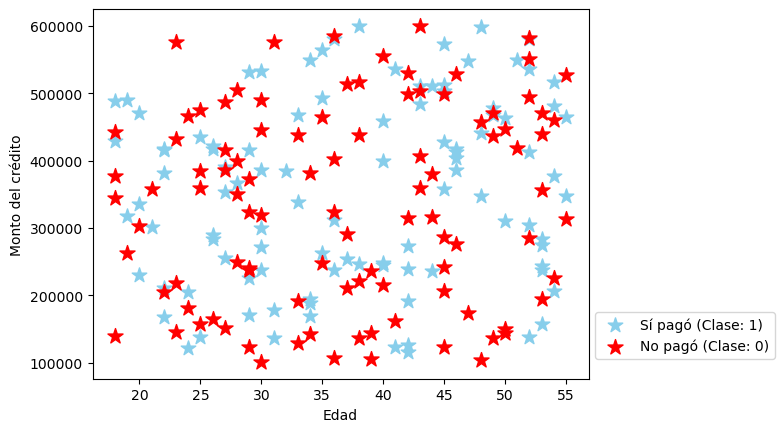

In [36]:
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=120, color="skyblue",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=130, color="red", 
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

#### Podemos observar en este data set, a diferentes clientes, y como se distribuyen en este gráfico, tienen una tendencia las dos clases de clientes, bastante bien distribuida a simple vista, pero si le prestamos atención, entre los clientes de entre 30-55 suelen haber mas clientes que pagan y cumplen con su deuda.

# Preparación de los datos

### Prepararemos los datos para empezar a entrenar a nuestro modelo, de manera escalar, para que sea mas fácil su uso en el modelo de los K-Vecinos

In [57]:
datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)

### Ya con los datos normalizados para el modelo, empecemos con el modelos clasificador, clasificará los nuevos clientes y podremos ver en que posición lo pone en el gráfico

In [18]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

### Nuevo Cliente:

In [19]:
edad= 35
monto= 500000

In [22]:
# Normalizar/escalar 
solicitante = escalador.transform([[edad, monto]])

C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [23]:
#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


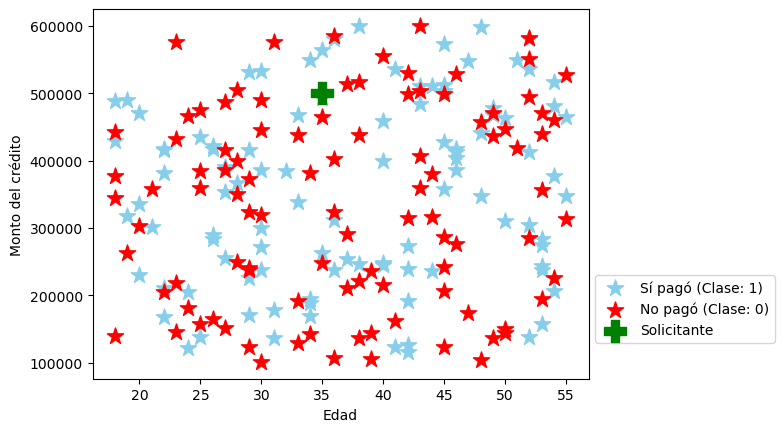

In [24]:
#Gráfico de la nueva predicción:
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante") 
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

#### Se puede aprecira la posición que se encuentra este nuevo cliente, está rodeado tanto de clientes que pagaron como de los que no

#### Veamos una prueba con otros solicitantes y su tendencia

In [49]:
#Datos sinténticos de todos los posibles solicitantes
creditos = np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades = np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos = pd.DataFrame(np.stack((edades, creditos), axis=2)[0],
                     columns=["edad", "credito"])
# Creó solicitantes nuevos de entre 18 y 61 años, con préstamos de entre 100000 y 600001, creando un nuevo data frame para clasificar y graficar

In [50]:
#Escalar los datos
solicitantes = escalador.transform(todos)

In [51]:
#Predecir todas las clases
clases_resultantes = clasificador.predict(solicitantes)


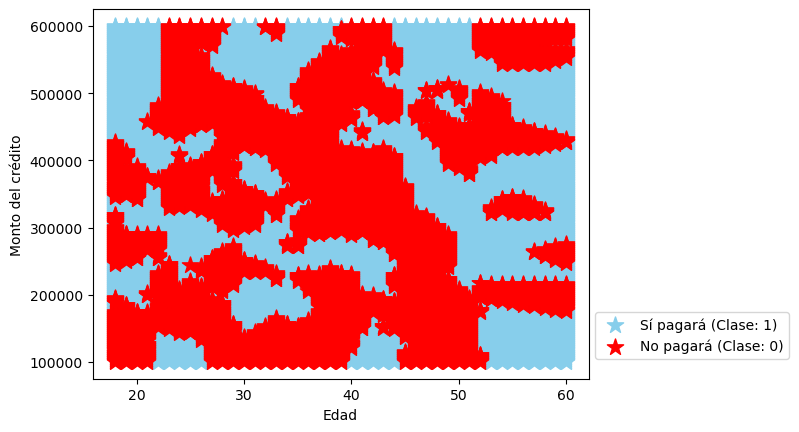

In [52]:
buenos = todos[clases_resultantes==1]
malos = todos[clases_resultantes==0]
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagará (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagará (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

### El modelo, agarró los clientes nuevos, creados al azar(sintéticos), los normalizó, clasificó, y a dicha  clasificación la graficó, mostrando la tendencia de los datos predichos, tneiendo en cuenta la edad y los montos. Esto demuestra la capacidad del modelo de clasificar grandes cantidades de datos y graficar dicha clasificacion.

In [53]:
accuracy = clasificador.score(datos, clase)
print(f"Precisión del modelo: {accuracy:.2%}")

Precisión del modelo: 74.00%


## Este modelo tiene un porcentaje de 74.00% de exactitud y precisión, lo cual puede mejorar, pero deja una buena clasificación a nivel general y en conjunto, sería mejor verlo de manera individual, eso será para otro modelo clasificador